# Testing the effect of Deep Learning

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import cv2 
import os

**_Reading Dataset_**

In [25]:
import os
import random
import shutil

train_dir = 'Dataset2/Dataset/Train/Train'  
valid_dir = 'Dataset2/Dataset/Validation/Validation'  
num_samples = 200  

class_names = ['Healthy', 'Rust', 'Powdery']

for class_name in class_names:
    class_train_dir = os.path.join(train_dir, class_name)
    class_valid_dir = os.path.join(valid_dir, class_name)

    os.makedirs(class_valid_dir, exist_ok=True)

 
    train_images = [f for f in os.listdir(class_train_dir) if f.endswith('.jpg')]

   
    selected_images = random.sample(train_images, num_samples)

  
    for image in selected_images:
        source_path = os.path.join(class_train_dir, image)
        dest_path = os.path.join(class_valid_dir, image)
        shutil.move(source_path, dest_path)  # Move the image file

    print(f"Moved {num_samples} images from class '{class_name}' to validation.")

print("Data split complete.")


Moved 200 images from class 'Healthy' to validation.
Moved 200 images from class 'Rust' to validation.
Moved 200 images from class 'Powdery' to validation.
Data split complete.


In [33]:
PLANT_LABELS = {
    'Healthy': 0,
    'Powdery': 1,
    'Rust': 2,

}

def load_dataset(base_path):
    train_images, train_labels = [], []
    valid_images, valid_labels = [], []
    test_images, test_labels = [], []
    class_names = []
    test_class_names = []  

   
    for folder in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder,folder)
        
        if os.path.isdir(folder_path):
            print(f"Loading data from {folder}...")
            # Iterate through each planet folder
            for plant in os.listdir(folder_path):
                plant_path = os.path.join(folder_path, plant)
                
                if os.path.isdir(plant_path):
                   
                    if plant not in class_names:
                        class_names.append(plant)
                    
                    print(f"Processing planet folder: {plant}...")
                    
             
                    for image_file in os.listdir(plant_path):
                        image_path = os.path.join(plant_path, image_file)
                     
                        image = cv2.imread(image_path)
                        if image is not None:
                            
                            image = cv2.resize(image, (224, 224))  
                         
                            if folder == 'Train':
                                train_images.append(image)
                                train_labels.append(PLANT_LABELS[plant])  
                            elif folder == 'Validation':
                                valid_images.append(image)
                                valid_labels.append(PLANT_LABELS[plant])  
                            elif folder == 'Test':
                                test_images.append(image)
                                test_labels.append(PLANT_LABELS[plant]) 
                                if plant not in test_class_names:
                                    test_class_names.append(plant)  

    return (
        np.array(train_images), np.array(train_labels), 
        np.array(valid_images), np.array(valid_labels), 
        np.array(test_images), np.array(test_labels), 
        class_names, test_class_names
    )


dataset_path = 'Dataset2/Dataset'  
train_images, train_labels, valid_images, valid_labels, test_images, test_labels, class_names, test_class_names = load_dataset(dataset_path)


print(f'Train: {len(train_images)} images and {len(train_labels)} labels.')
print(f'Validation: {len(valid_images)} images and {len(valid_labels)} labels.')
print(f'Test: {len(test_images)} images and {len(test_labels)} labels.')
print(f'Class names (train/valid): {class_names}')
print(f'Class names (test): {test_class_names}')

Loading data from Test...
Processing planet folder: Healthy...
Processing planet folder: Powdery...
Processing planet folder: Rust...
Loading data from Train...
Processing planet folder: Healthy...
Processing planet folder: Powdery...
Processing planet folder: Rust...
Loading data from Validation...
Processing planet folder: Healthy...
Processing planet folder: Powdery...
Processing planet folder: Rust...
Train: 6010 images and 6010 labels.
Validation: 660 images and 660 labels.
Test: 150 images and 150 labels.
Class names (train/valid): ['Healthy', 'Powdery', 'Rust']
Class names (test): ['Healthy', 'Powdery', 'Rust']


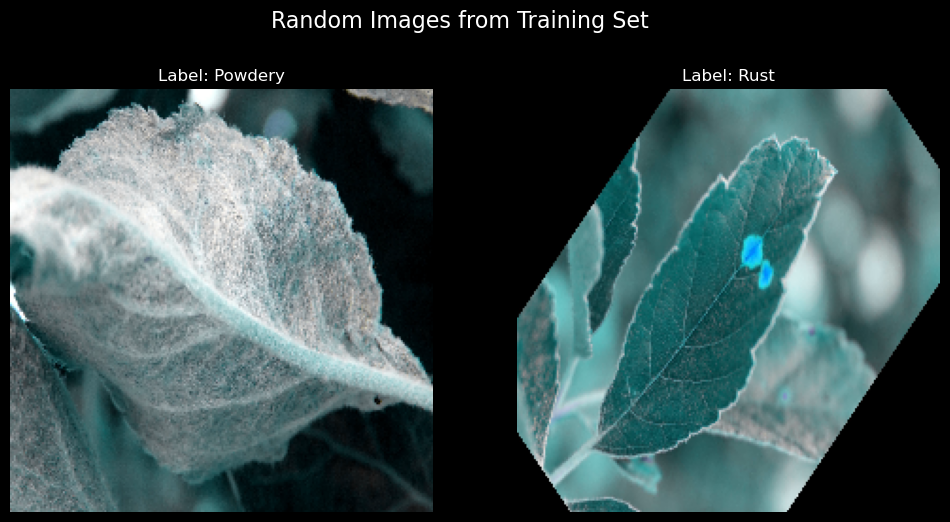

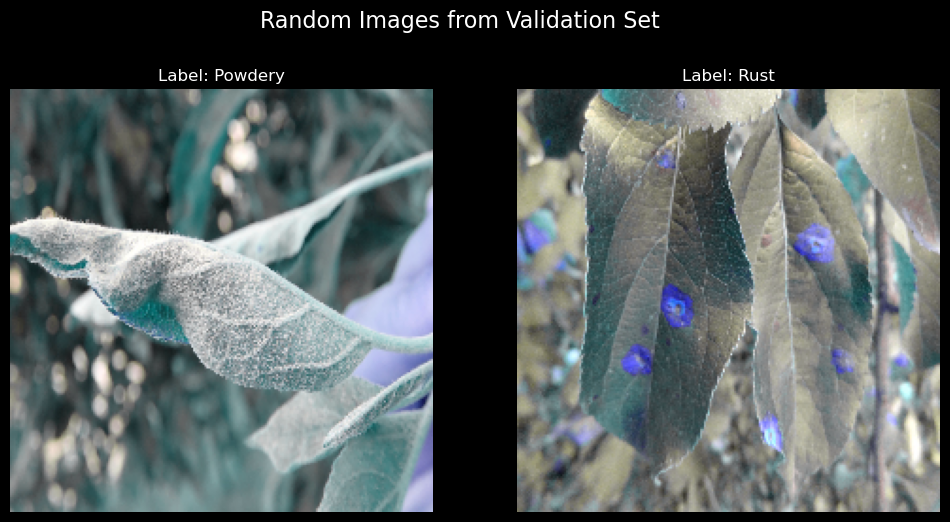

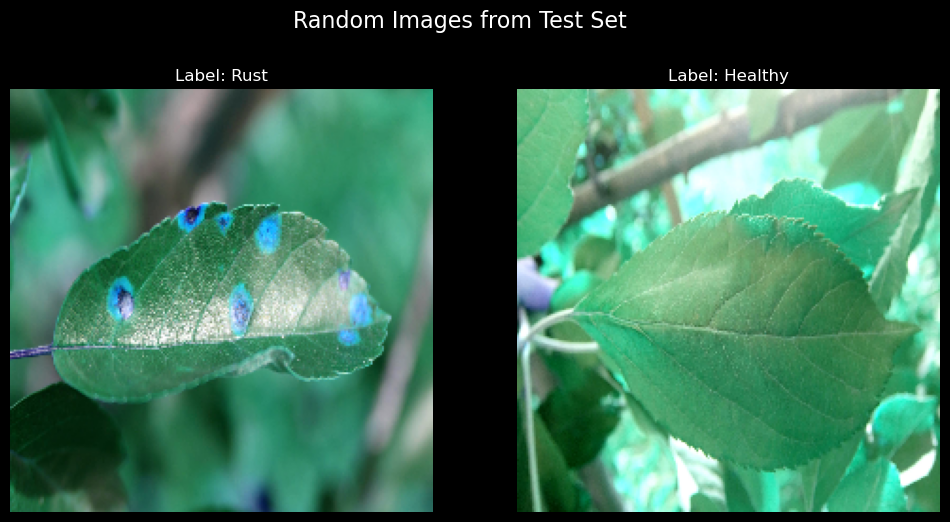

In [34]:
class_names = ['Healthy', 'Powdery', 'Rust']  

def plot_random_images(train_images, train_labels, valid_images, valid_labels, test_images, test_labels):
  
    def plot_images(images, labels, dataset_name, num_images=2):
       
        random_indices = np.random.choice(len(images), num_images, replace=False)
        
   
        fig, axes = plt.subplots(1, num_images, figsize=(12, 6))
        fig.suptitle(f'Random Images from {dataset_name}', fontsize=16)
        
        for ax, idx in zip(axes, random_indices):
            ax.imshow(images[idx].astype(np.uint8)) 
            ax.set_title(f'Label: {class_names[labels[idx]]}')  
            ax.axis('off')  
        
        plt.show()
    

    plot_images(train_images, train_labels, 'Training Set')
    plot_images(valid_images, valid_labels, 'Validation Set')
    plot_images(test_images, test_labels, 'Test Set')


plot_random_images(train_images, train_labels, valid_images, valid_labels, test_images, test_labels)

In [35]:
def print_shapes(train_images, train_labels, valid_images, valid_labels, test_images, test_labels):
    print(f'Training Images Shape: {train_images.shape}')
    print(f'Training Labels Shape: {train_labels.shape}')
    print(f'Validation Images Shape: {valid_images.shape}')
    print(f'Validation Labels Shape: {valid_labels.shape}')
    print(f'Test Images Shape: {test_images.shape}')
    print(f'Test Labels Shape: {test_labels.shape}')

print_shapes(train_images, train_labels, valid_images, valid_labels, test_images, test_labels)

Training Images Shape: (6010, 224, 224, 3)
Training Labels Shape: (6010,)
Validation Images Shape: (660, 224, 224, 3)
Validation Labels Shape: (660,)
Test Images Shape: (150, 224, 224, 3)
Test Labels Shape: (150,)


In [36]:
def print_image_stats(images_np, dataset_name):
    print(f"{dataset_name} Images:")
    print(f"  Min Pixel Value: {np.min(images_np)}")
    print(f"  Max Pixel Value: {np.max(images_np)}")
    print(f"  Mean Pixel Value: {np.mean(images_np)}")
    print(f"  Std Pixel Value: {np.std(images_np)}")
    print()

# Print stats for train, valid, and test images
print_image_stats(np.array(train_images), "Training")
print_image_stats(np.array(valid_images), "Validation")
print_image_stats(np.array(test_images), "Test")

Training Images:
  Min Pixel Value: 0
  Max Pixel Value: 255
  Mean Pixel Value: 109.47321231152091
  Std Pixel Value: 61.12752297370071

Validation Images:
  Min Pixel Value: 0
  Max Pixel Value: 255
  Mean Pixel Value: 109.54044636616484
  Std Pixel Value: 60.092037230692036

Test Images:
  Min Pixel Value: 0
  Max Pixel Value: 255
  Mean Pixel Value: 120.03065387613378
  Std Pixel Value: 59.10138050486242



In [37]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def normalize_image_generator(images, labels, batch_size):
    while True:  # Infinite loop to generate batches
        for i in range(0, len(images), batch_size):
            batch_images = images[i:i+batch_size]
            batch_labels = labels[i:i+batch_size]
            
            # Normalize images to [0, 1]
            normalized_images = np.array([(image / 255.0).astype(np.float32) for image in batch_images])
            
            # Yield both images and labels as a tuple
            yield normalized_images, batch_labels

train_generator = normalize_image_generator(train_images, train_labels, batch_size=32)
valid_generator = normalize_image_generator(valid_images, valid_labels, batch_size=32)
test_generator = normalize_image_generator(test_images, test_labels, batch_size=32)


print(f"Training Data Length: {len(train_images)}")
print(f"Validation Data Length: {len(valid_images)}")
print(f"Test Data Length: {len(test_images)}")
# Get a sample batch
sample_batch_images, sample_batch_labels = next(train_generator)
print(f"Sample Batch Images Shape: {sample_batch_images.shape}")
print(f"Sample Batch Labels Shape: {sample_batch_labels.shape}")

sample_batch_images, sample_batch_labels = next(valid_generator)
print(f"Sample Batch Images Shape: {sample_batch_images.shape}")
print(f"Sample Batch Labels Shape: {sample_batch_labels.shape}")
sample_batch_images, sample_batch_labels = next(test_generator)
print(f"Sample Batch Images Shape: {sample_batch_images.shape}")
print(f"Sample Batch Labels Shape: {sample_batch_labels.shape}")



Training Data Length: 6010
Validation Data Length: 660
Test Data Length: 150
Sample Batch Images Shape: (32, 224, 224, 3)
Sample Batch Labels Shape: (32,)
Sample Batch Images Shape: (32, 224, 224, 3)
Sample Batch Labels Shape: (32,)
Sample Batch Images Shape: (32, 224, 224, 3)
Sample Batch Labels Shape: (32,)


In [38]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2,ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import InceptionV3

In [39]:
num_classes = len(np.unique(train_labels))  # Number of unique classes in the training set

# Load the pre-trained MobileNetV2 model without the top classification layers
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# # Freeze the base model layers
# for layer in base_model.layers:
#     layer.trainable = False
for layer in base_model.layers:  
    layer.trainable = False

# Create the model
model = tf.keras.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),  
    Dropout(0.5),                 
    Dense(num_classes, activation='softmax') 
])


model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9),
#               loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)


history = model.fit(
    train_generator, 
    steps_per_epoch=6010//32,
    validation_data=valid_generator,  
    epochs=30,  
     validation_steps=660//32,
    callbacks=[early_stopping, reduce_lr]
)



Epoch 1/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - accuracy: 0.8234 - loss: 0.7849 - val_accuracy: 0.3503 - val_loss: 6.3177 - learning_rate: 1.0000e-04
Epoch 2/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.5925 - loss: 2.7305 - val_accuracy: 0.3125 - val_loss: 2.4448 - learning_rate: 1.0000e-04
Epoch 3/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.6619 - loss: 1.0662 - val_accuracy: 0.3296 - val_loss: 1.7227 - learning_rate: 1.0000e-04
Epoch 4/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.7086 - loss: 0.7388 - val_accuracy: 0.4586 - val_loss: 1.3374 - learning_rate: 1.0000e-04
Epoch 5/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.7519 - loss: 0.6009 - val_accuracy: 0.5334 - val_loss: 1.0257 - learning_rate: 1.0000e-04
Epoch 6/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - accuracy: 0.7848 - loss: 0.4844 - val_accuracy: 0.5637 - val_loss: 0.9959 - learning_rate: 1.0000e-04
Epoch 7/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - acc

In [40]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=32)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 830ms/step - accuracy: 0.9293 - loss: 0.2689
Test Loss: 0.2505, Test Accuracy: 0.9336


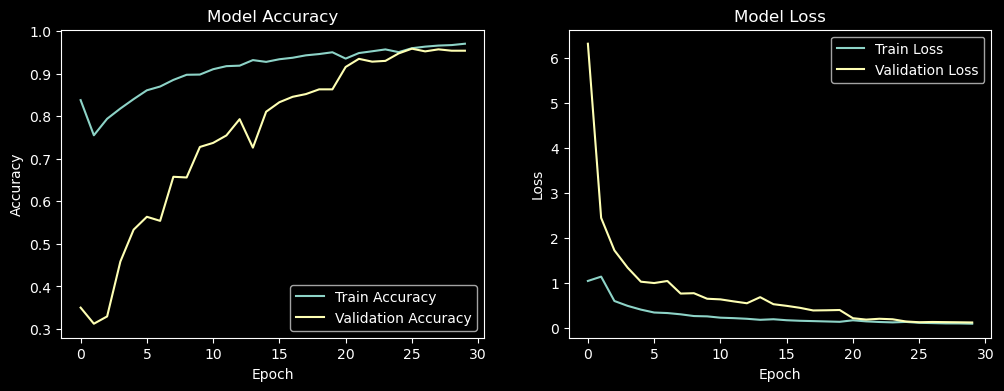

In [41]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

import math


def create_test_generator():
    return normalize_image_generator(test_images, test_labels, batch_size=32)


steps = math.ceil(len(test_images) / 32)  


def process_test_data(generator):
    true_labels = []
    predictions = []
    
   
    for i, (images, labels) in enumerate(generator):
     
        batch_predictions = model.predict(images)
        print(len(images))
        
    
        predictions.append(batch_predictions)
        true_labels.extend(labels)
        
      
        if i+1 >= steps:  
            break
            
    return true_labels, predictions


test_generator = create_test_generator()
true_labels, predictions = process_test_data(test_generator)

test_generator = create_test_generator()
sample_batch_images, sample_batch_labels = next(test_generator)
print(f"Sample Batch Images Shape: {sample_batch_images.shape}")
print(f"Sample Batch Labels Shape: {sample_batch_labels.shape}")

y_pred = np.argmax(np.vstack(predictions), axis=1)


cm = confusion_matrix(true_labels, y_pred)
print("Confusion Matrix:\n", cm)

report = classification_report(true_labels, y_pred)
print("Classification Report:\n", report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
32
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 867ms/step
32
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 978ms/step
32
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 899ms/step
32
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step
22
Sample Batch Images Shape: (32, 224, 224, 3)
Sample Batch Labels Shape: (32,)
Confusion Matrix:
 [[48  1  1]
 [ 3 45  2]
 [ 3  0 47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92        50
           1       0.98      0.90      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.93       150
   macro avg       0.94      0.93      0.93       150
weighted avg       0.94      0.93      0.93       150



F1 Score: 0.9335
ROC-AUC Score: 0.9872


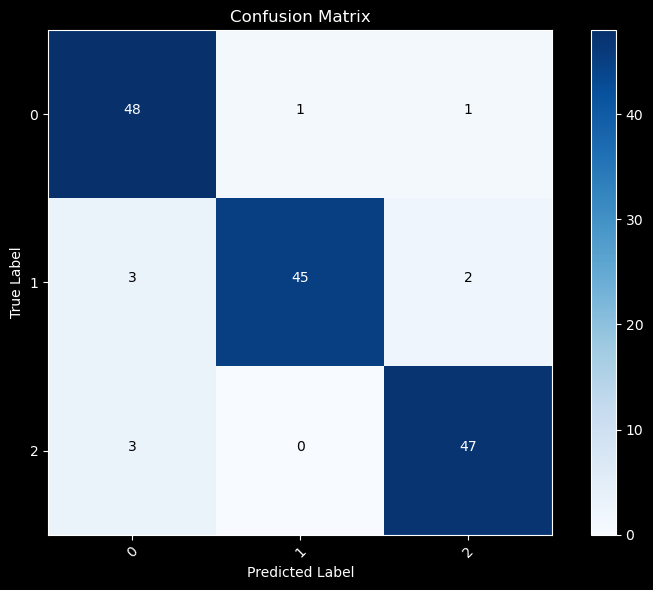

In [74]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve
import numpy as np


def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    # Add values to the cells
    thresh = cm.max() / 2
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.show()


f1 = f1_score(true_labels, y_pred, average='weighted') 
print(f"F1 Score: {f1:.4f}")


try:
    roc_auc = roc_auc_score(true_labels, np.vstack(predictions), multi_class='ovr')
    print(f"ROC-AUC Score: {roc_auc:.4f}")
except ValueError as e:
    print(f"Could not calculate ROC-AUC Score: {e}")


class_names = list(range(len(set(true_labels))))  
plot_confusion_matrix(cm, class_names)



Model saved as 'saved_model.joblib'.
Model loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Sample Prediction: [[9.9456847e-01 2.4703285e-04 5.1845121e-03]
 [9.6613073e-01 1.7274199e-02 1.6595097e-02]
 [9.6872842e-01 3.7987030e-03 2.7472861e-02]
 [9.8280627e-01 5.9545357e-03 1.1239242e-02]
 [9.7526938e-01 1.5566638e-04 2.4574975e-02]
 [9.1683024e-01 5.7950146e-03 7.7374712e-02]
 [9.9056166e-01 2.5557133e-03 6.8825944e-03]
 [8.8616836e-01 2.8781082e-02 8.5050628e-02]
 [8.4986734e-01 1.5938720e-04 1.4997327e-01]
 [9.5190310e-01 1.6416615e-03 4.6455219e-02]
 [9.9245435e-01 1.8055585e-05 7.5275758e-03]
 [9.9693227e-01 1.2423148e-04 2.9435109e-03]
 [9.9276215e-01 7.8555822e-05 7.1592219e-03]
 [9.8515284e-01 3.9604655e-03 1.0886785e-02]
 [9.9659222e-01 3.2170046e-06 3.4044981e-03]
 [9.9764937e-01 1.3298215e-06 2.3492733e-03]
 [7.6880533e-01 1.8313482e-01 4.8059829e-02]
 [9.9747890e-01 6.8954801e-06 2.5142084e-03]
 [9.8921597e-01 7.0460635e-04 1.0079365e-02]
 [5.1651001e-01 4.0879600e

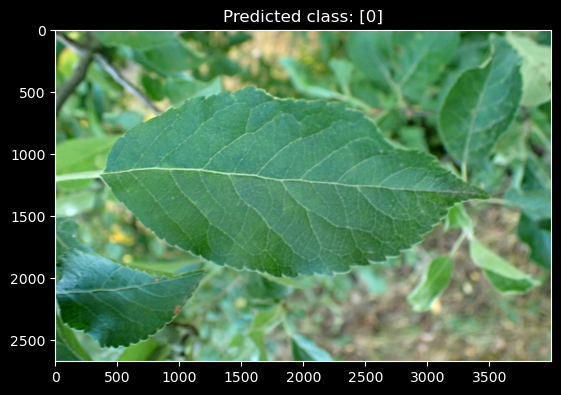

In [77]:
import joblib
joblib.dump(model, 'saved_model.joblib')
print("Model saved as 'saved_model.joblib'.")


loaded_model = joblib.load('saved_model.joblib')
print("Model loaded successfully.")


sample_prediction = loaded_model.predict(sample_batch_images)
print(f"Sample Prediction: {sample_prediction}")
from tensorflow.keras.preprocessing import image as keras_image  
import matplotlib.pyplot as plt


model = joblib.load('saved_model.joblib')


def load_and_preprocess_image(image_path, target_size=(224, 224)):
 
    img = keras_image.load_img(image_path, target_size=target_size) 
    
    img_array = keras_image.img_to_array(img) 
    img_array = np.expand_dims(img_array, axis=0)  
    img_array = img_array / 255.0 
    
    return img_array

image_path = 'Dataset2/Dataset/Test/Test/Healthy/8e6a823cce9ff40c.jpg'  

img_array = load_and_preprocess_image(image_path)


prediction = model.predict(img_array)

predicted_class = np.argmax(prediction, axis=1)

img = keras_image.load_img(image_path)  
plt.imshow(img)
plt.title(f'Predicted class: {predicted_class}')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


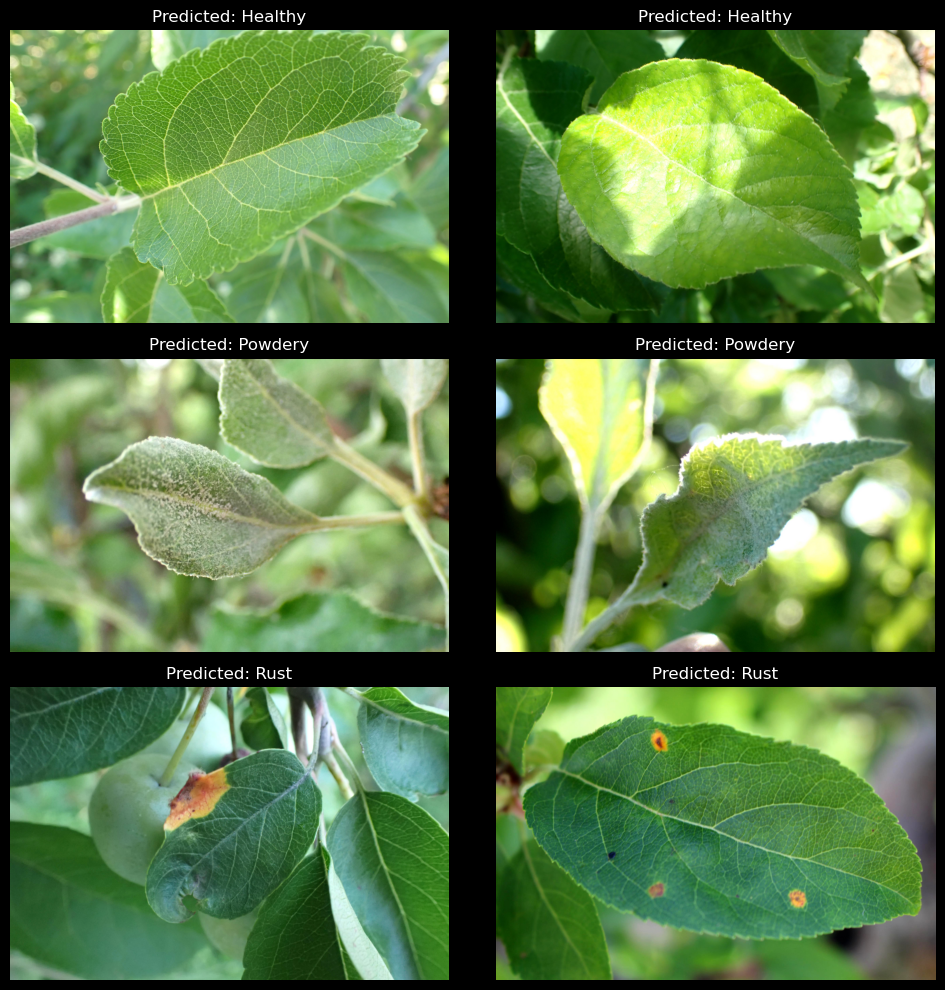

In [79]:

def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = keras_image.load_img(image_path, target_size=target_size)
    img_array = keras_image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  
    return img_array


test_folder = 'Dataset2/Dataset/Test/Test' 
class_names = os.listdir(test_folder)


class_images = {}

for class_name in class_names:
    class_folder = os.path.join(test_folder, class_name)
    if os.path.isdir(class_folder): 
        class_images[class_name] = [os.path.join(class_folder, f) for f in os.listdir(class_folder)]

random_images = []

for class_name, images in class_images.items():
    selected_images = random.sample(images, 2)  
    random_images.extend(selected_images)


fig, axes = plt.subplots(len(random_images) // 2, 2, figsize=(10, 10))
axes = axes.flatten()

for i, image_path in enumerate(random_images):
 
    img_array = load_and_preprocess_image(image_path)
    
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    

    img = keras_image.load_img(image_path)
    axes[i].imshow(img)
    axes[i].set_title(f'Predicted: {class_names[predicted_class[0]]}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()